In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

NBINS = 20

def list_to_indices(keys):
    n_keys = len(keys)
    values = range(n_keys)
    return dict(zip(keys, values))

def pearson_correlation(means, test):
    pearson_corr = np.corrcoef(test, means)
    return pearson_corr[0, 1]

In [28]:
# read in dataset
df = pd.read_csv('~/Documents/research/tansey/msk_intern/pyro_model/data/rep-gdsc-ctd2.csv')

In [30]:
cols = ['Drug.Name', 'ccle', 'REP_published_auc', 'CTD2_published_auc', 
        'GDSC_published_auc', 'REP_auc_overlap', 'CTD2_auc_overlap', 'GDSC_auc_overlap']
df = df[cols]
print('df rows: ' + str(len(df)))

df rows: 25670


In [31]:
# drop rows with nans
df = df.dropna()
print('df rows after dropping NaNs: ' + str(len(df)))

df rows after dropping NaNs: 25562


In [32]:
# map drugs, samples to indices
drugs = df['Drug.Name'].unique()
samples = df['ccle'].unique()
drug_indices = list_to_indices(drugs)
sample_indices = list_to_indices(samples)
df['drug_id'] = df['Drug.Name'].replace(drug_indices)
df['sample_id'] = df['ccle'].replace(sample_indices)

In [33]:
print('num samples: ' + str(df.sample_id.nunique()))
print('num drugs: ' + str(df.drug_id.nunique()))

num samples: 318
num drugs: 84


In [34]:
# average values for each (sample, drug) pair
cols_to_average = ['REP_published_auc', 'CTD2_published_auc', 'GDSC_published_auc', 'REP_auc_overlap', 
                   'CTD2_auc_overlap', 'GDSC_auc_overlap']
for col in cols_to_average:
    d = df.groupby(['sample_id', 'drug_id'])[col].mean().reset_index(name = col + '_mean')
    df = df.merge(d, on=['sample_id', 'drug_id'], validate='many_to_one')

In [37]:
# keep columns with averages
new_cols = ['Drug.Name', 'ccle', 'drug_id', 'sample_id','REP_published_auc_mean', 'CTD2_published_auc_mean', 
            'GDSC_published_auc_mean', 'REP_auc_overlap_mean', 'CTD2_auc_overlap_mean', 'GDSC_auc_overlap_mean']
df = df[new_cols]
print('len(df): ' + str(len(df)))
df = df.drop_duplicates()
print('len(df) after dropping duplicates: ' + str(len(df)))

len(df): 25562
len(df) after dropping duplicates: 16588


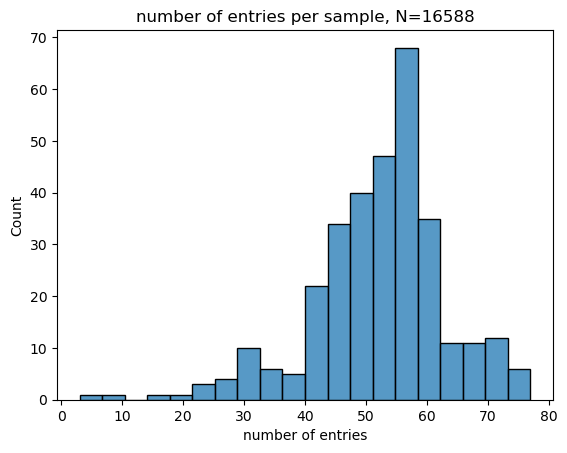

In [52]:
n_entries = df.groupby('sample_id')['sample_id'].count().reset_index(name='count')['count'].to_numpy()
title = 'number of entries per sample, N=' + str(np.sum(n_entries))
plt.xlabel('number of entries')
plt.title(title)
sns.histplot(n_entries, bins=NBINS)
plt.show()

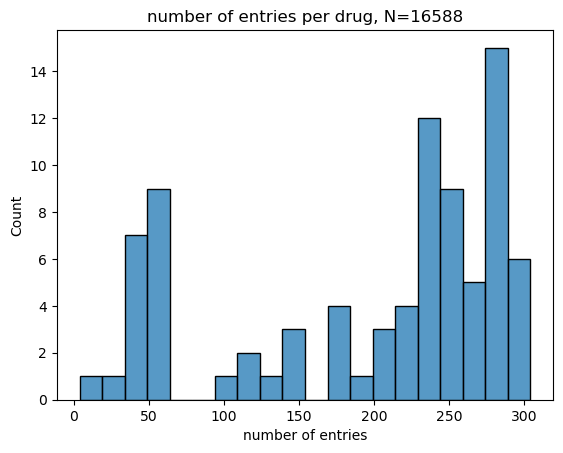

In [53]:
n_entries = df.groupby('drug_id')['drug_id'].count().reset_index(name='count')['count'].to_numpy()
title = 'number of entries per drug, N=' + str(np.sum(n_entries))
plt.xlabel('number of entries')
plt.title(title)
sns.histplot(n_entries, bins=NBINS)
plt.show()

<Figure size 640x480 with 0 Axes>

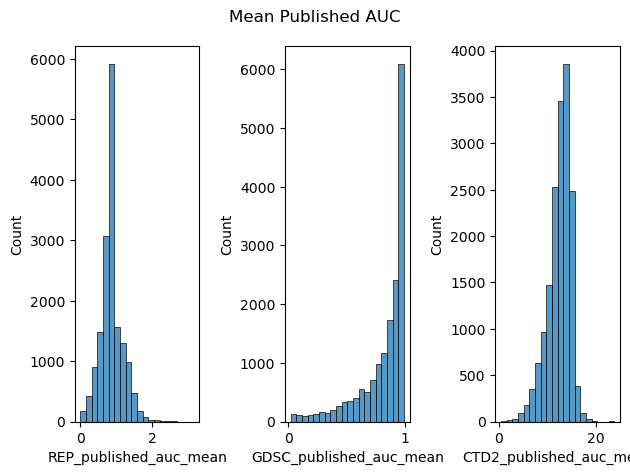

In [72]:
plt.clf()
fig = plt.figure()
suptitle = 'Mean Published AUC'
plt.suptitle(suptitle)
plt.subplot(1, 3, 1)
sns.histplot(df['REP_published_auc_mean'], bins=NBINS)
plt.subplot(1, 3, 2)
sns.histplot(df['GDSC_published_auc_mean'], bins=NBINS)
plt.subplot(1, 3, 3)
sns.histplot(df['CTD2_published_auc_mean'], bins=NBINS)
fig.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

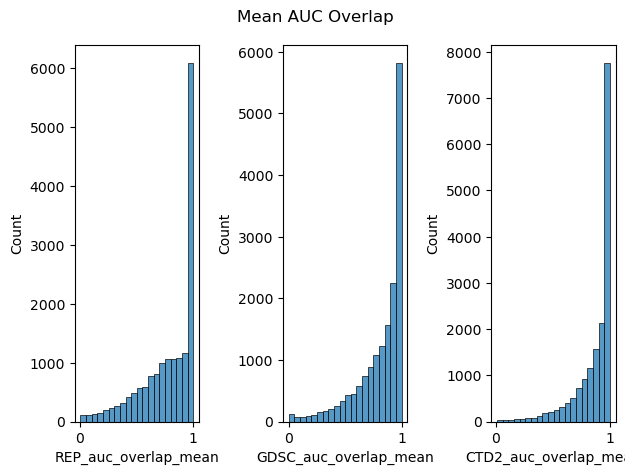

In [73]:
plt.clf()
fig = plt.figure()
suptitle = 'Mean AUC Overlap'
plt.suptitle(suptitle)
plt.subplot(1, 3, 1)
sns.histplot(df['REP_auc_overlap_mean'], bins=NBINS)
plt.subplot(1, 3, 2)
sns.histplot(df['GDSC_auc_overlap_mean'], bins=NBINS)
plt.subplot(1, 3, 3)
sns.histplot(df['CTD2_auc_overlap_mean'], bins=NBINS)
fig.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

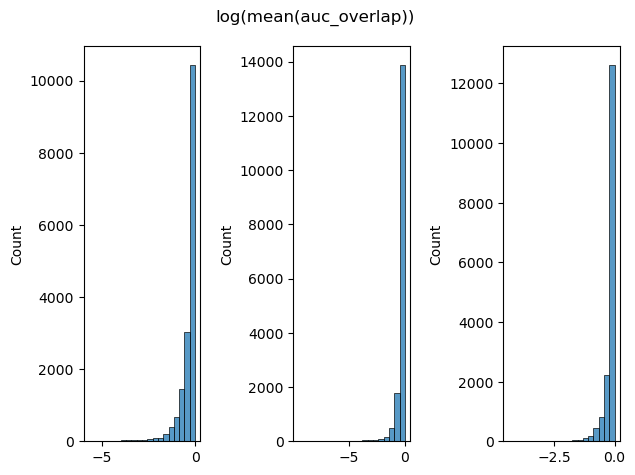

In [74]:
plt.clf()
fig = plt.figure()
suptitle = 'log(mean(auc_overlap))'
plt.suptitle(suptitle)
plt.subplot(1, 3, 1)
sns.histplot(np.log(df['REP_auc_overlap_mean'].to_numpy()), bins=NBINS)
plt.subplot(1, 3, 2)
sns.histplot(np.log(df['GDSC_auc_overlap_mean'].to_numpy()), bins=NBINS)
plt.subplot(1, 3, 3)
sns.histplot(np.log(df['CTD2_auc_overlap_mean'].to_numpy()), bins=NBINS)
fig.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

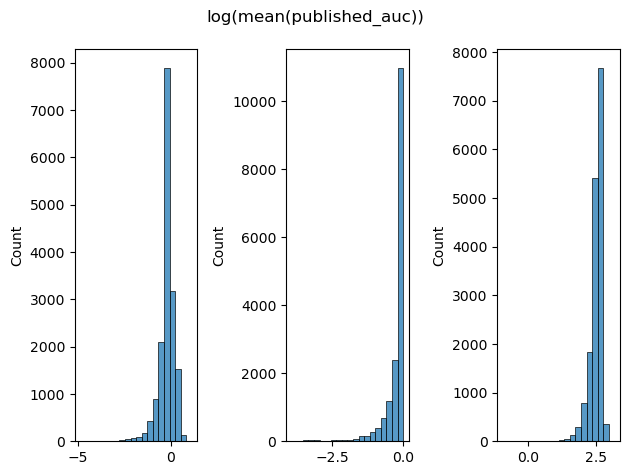

In [75]:
plt.clf()
fig = plt.figure()
suptitle = 'log(mean(published_auc))'
plt.suptitle(suptitle)
plt.subplot(1, 3, 1)
sns.histplot(np.log(df['REP_published_auc_mean'].to_numpy()), bins=NBINS)
plt.subplot(1, 3, 2)
sns.histplot(np.log(df['GDSC_published_auc_mean'].to_numpy()), bins=NBINS)
plt.subplot(1, 3, 3)
sns.histplot(np.log(df['CTD2_published_auc_mean'].to_numpy()), bins=NBINS)
fig.tight_layout()
plt.show()

In [71]:
# correlation comparisons referenced in paper
print('Pearson correlation for auc_overlap, between...')
print('REP and CTD2: ' + str(pearson_correlation(df['REP_auc_overlap_mean'].to_numpy(), df['CTD2_auc_overlap_mean'])))
print('GDSC and CTD2: ' + str(pearson_correlation(df['GDSC_auc_overlap_mean'].to_numpy(), df['CTD2_auc_overlap_mean'])))
print('REP and GDSC: ' + str(pearson_correlation(df['GDSC_auc_overlap_mean'].to_numpy(), df['REP_auc_overlap_mean'])))

Pearson correlation for auc_overlap, between...
REP and CTD2: 0.6045446807962896
GDSC and CTD2: 0.6224544934289994
REP and GDSC: 0.5961351111834363


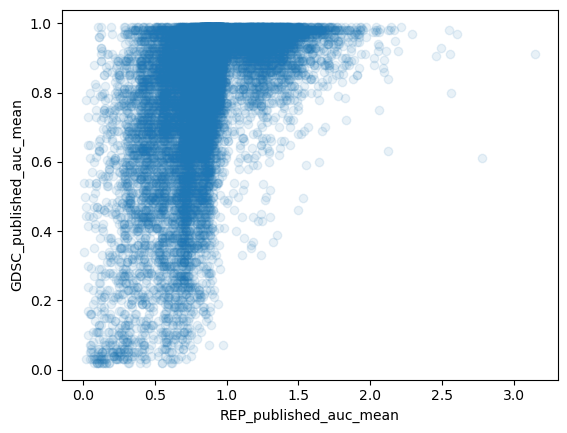

In [90]:
plt.clf()
plt.xlabel('REP_published_auc_mean')
plt.ylabel('GDSC_published_auc_mean')
plt.scatter(df['REP_published_auc_mean'], df['GDSC_published_auc_mean'], alpha=.1)

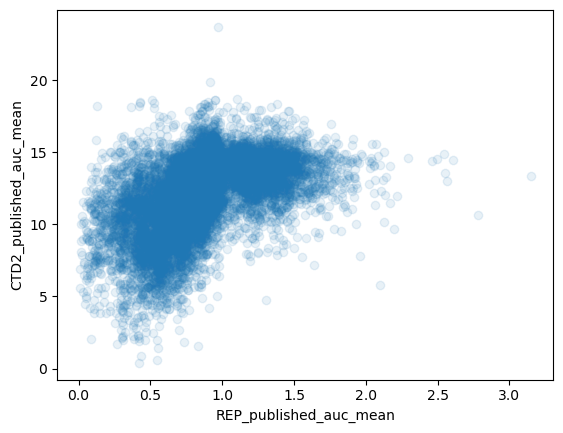

In [91]:
plt.clf()
plt.xlabel('REP_published_auc_mean')
plt.ylabel('CTD2_published_auc_mean')
plt.scatter(df['REP_published_auc_mean'], df['CTD2_published_auc_mean'], alpha=.1)

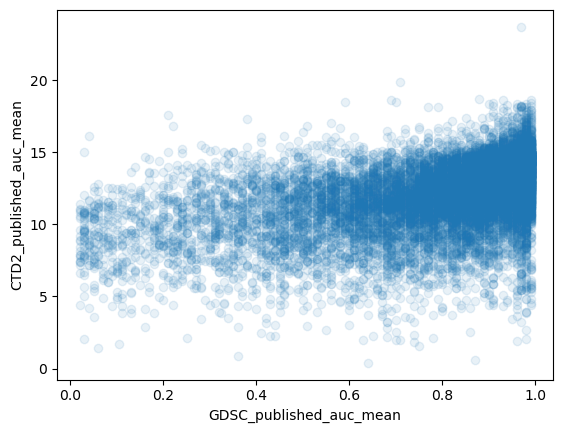

In [92]:
plt.xlabel('GDSC_published_auc_mean')
plt.ylabel('CTD2_published_auc_mean')
plt.scatter(df['GDSC_published_auc_mean'], df['CTD2_published_auc_mean'], alpha=.1)